# Part 1. Comparing across continents

In this section, we aim to visually display the daily total confirmed cases of COVID-19 from the beginning of the outbreak around 12/31/19 to 04/29/20 in each six continents. Then, we analyzed the data using summmary functions by computing the mean, standard deviation, and rate of increase in each continent. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [31]:
covid_continents = pd.read_csv("covid_continents.csv")
covid_continents.head()

,Unnamed: 0,Entity,Code,Date,Total_confirmed_cases
0,545,Asia,NaN,31-Dec-19,27
1,546,Asia,NaN,1-Jan-20,27
2,547,Asia,NaN,2-Jan-20,27
3,548,Asia,NaN,3-Jan-20,44
4,549,Asia,NaN,4-Jan-20,44


In [32]:
# Select wanted columns only
covid_continents = covid_continents[['Entity', 'Date', 'Total_confirmed_cases']]

# Rename the column "Entity" to "Continent"
covid_continents = covid_continents.rename(columns = {'Entity': 'Continent'})

# Set the column "Continent" as the index
covid_continents.set_index('Continent', inplace=True, drop=True)

# Compute the log of total confirmed cases and add the log column to df
covid_continents["Log_total_confirmed_cases"] = np.log(covid_continents.Total_confirmed_cases)

# Convert date to number of days after 12/31/19 and add that column to df
# Acknowledge Prof.Mimno's code
covid_continents["Date"] = pd.to_datetime(covid_continents["Date"])
start_date = pd.Timestamp("2019-12-31")
covid_continents["Daysafter"] = (covid_continents["Date"] - start_date).dt.days

covid_continents.head()

,Date,Total_confirmed_cases,Log_total_confirmed_cases,Daysafter
Continent,,,,
Asia,2019-12-31,27,3.295837,0
Asia,2020-01-01,27,3.295837,1
Asia,2020-01-02,27,3.295837,2
Asia,2020-01-03,44,3.784190,3
Asia,2020-01-04,44,3.784190,4


## Total confirmed cases in 6 continents

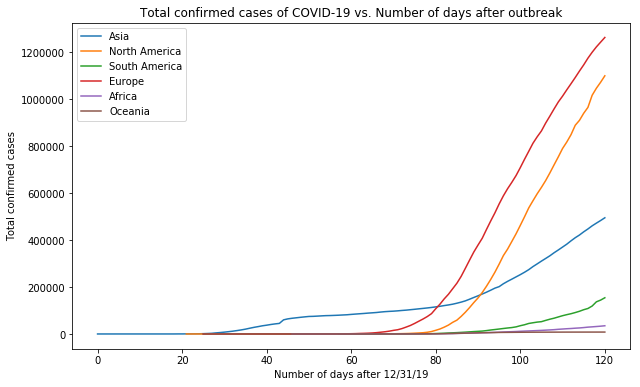

In [33]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Total confirmed cases")
plt.show()

## Log of total confirmed cases in 6 continents - comparing the rate of increase

Computing log transforms an exponential growth to a linear growth

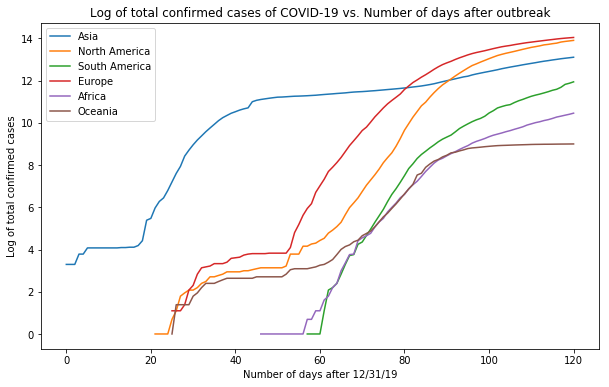

In [34]:
plt.figure(figsize=(10,6))

plt.plot(covid_continents.loc["Asia"].Daysafter, covid_continents.loc["Asia"].Log_total_confirmed_cases, label="Asia")
plt.plot(covid_continents.loc["North America"].Daysafter, covid_continents.loc["North America"].Log_total_confirmed_cases, label="North America")
plt.plot(covid_continents.loc["South America"].Daysafter, covid_continents.loc["South America"].Log_total_confirmed_cases, label="South America")
plt.plot(covid_continents.loc["Europe"].Daysafter, covid_continents.loc["Europe"].Log_total_confirmed_cases, label="Europe")
plt.plot(covid_continents.loc["Africa"].Daysafter, covid_continents.loc["Africa"].Log_total_confirmed_cases, label="Africa")
plt.plot(covid_continents.loc["Oceania"].Daysafter, covid_continents.loc["Oceania"].Log_total_confirmed_cases, label="Oceania")

plt.legend(loc="upper left")
plt.title("Log of total confirmed cases of COVID-19 vs. Number of days after outbreak")
plt.xlabel("Number of days after 12/31/19")
plt.ylabel("Log of total confirmed cases")
plt.show()

In [35]:
# Create a function that returns the number of initial cases and the growth rate up to a certain day

def summary(continent, day):
    print(continent)
    covid = covid_continents.loc[continent]
    
    # nested function that calculates the slope, coeficcient, and r^2 value
    # Acknowledge Prof.Mimno's code
    def lm(df, inputs, output):
        model = LinearRegression().fit(df[inputs], df[output])
        coef_strings = ["{:.2f}".format(coefficient) for coefficient in model.coef_]
        r2_score = model.score(df[inputs], df[output])
        print("coefficients: {} intercept: {:.2f};   r^2: {:.2f}"
              .format(", ".join(coef_strings), model.intercept_, r2_score))
        return model.intercept_, coef_strings[0]
       
    print("\nBefore Day {}".format(day))
    model_before = lm(covid[ covid["Daysafter"] < day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_before[0]), 100 * (np.exp(float(model_before[1])) - 1)))
    
    print("\nAfter Day {}".format(day))
    model_after = lm(covid[ covid["Daysafter"] > day], ["Daysafter"],"Log_total_confirmed_cases" )
    print("initial cases: {:.1f}, growth rate: {:.0f}%".format(np.exp(model_after[0]), 100 * (np.exp(float(model_after[1])) - 1)))

## Using trial and error to find out the number of days each continent took to flatten out the curve

In [36]:
summary("Asia", 50)

Asia

Before Day 50
coefficients: 0.20 intercept: 2.35;   r^2: 0.95
initial cases: 10.5, growth rate: 22%

After Day 50
coefficients: 0.03 intercept: 9.47;   r^2: 0.96
initial cases: 12921.4, growth rate: 3%


In [37]:
summary("Africa", 95)

Africa

Before Day 95
coefficients: 0.22 intercept: -11.39;   r^2: 0.98
initial cases: 0.0, growth rate: 25%

After Day 95
coefficients: 0.06 intercept: 3.47;   r^2: 1.00
initial cases: 32.2, growth rate: 6%


In [38]:
summary("Europe", 93)

Europe

Before Day 93
coefficients: 0.19 intercept: -4.20;   r^2: 0.96
initial cases: 0.0, growth rate: 21%

After Day 93
coefficients: 0.03 intercept: 10.13;   r^2: 0.97
initial cases: 24990.1, growth rate: 3%


In [39]:
summary("North America", 108)

North America

Before Day 108
coefficients: 0.17 intercept: -4.11;   r^2: 0.96
initial cases: 0.0, growth rate: 19%

After Day 108
coefficients: 0.03 intercept: 9.81;   r^2: 1.00
initial cases: 18223.6, growth rate: 3%


In [40]:
summary("South America", 83)

South America

Before Day 83
coefficients: 0.34 intercept: -19.22;   r^2: 0.99
initial cases: 0.0, growth rate: 40%

After Day 83
coefficients: 0.09 intercept: 1.12;   r^2: 0.98
initial cases: 3.1, growth rate: 9%


In [41]:
summary("Oceania", 105)

Oceania

Before Day 105
coefficients: 0.11 intercept: -2.24;   r^2: 0.93
initial cases: 0.1, growth rate: 12%

After Day 105
coefficients: 0.00 intercept: 8.61;   r^2: 0.94
initial cases: 5469.6, growth rate: 0%


# Part 2. Comparing across countries

We found out that the three countinents with the highest total confirmed cases are Europe, North America, and Asia. Next, we want to analyze specific countries within each continent and determine what factors have the most influence on the spread of COVID-19. To do so, we will pick the top 10 countries with the highest total confirmed cases in each continent. Together, we will be comparing across 30 countries. 

In [42]:
countries_0429 = pd.read_csv("countries_0429.csv", keep_default_na=False)
countries_0429.drop(countries_0429.columns[0],axis=1,inplace=True)
countries_0429.head()


,Entity,Code,Date,Total_confirmed_cases,Continent
0,Afghanistan,AFG,29-Apr-20,1827,AS
1,Albania,ALB,29-Apr-20,750,EU
2,Algeria,DZA,29-Apr-20,3649,AF
3,Andorra,AND,29-Apr-20,748,EU
4,Angola,AGO,29-Apr-20,27,AF


In [43]:
# Select wanted columns only
countries_0429 = countries_0429[['Entity', 'Date', 'Continent','Total_confirmed_cases']]

countries_0429 = pd.DataFrame(data=countries_0429)

# Rename the column "Entity" to "Continent"
countries_0429 = countries_0429.rename(columns = {'Entity': 'Country Name'})


# Compute the log of total confirmed cases and add the log column to df
countries_0429["Log_total_confirmed_cases"] = np.log(countries_0429.Total_confirmed_cases)

countries_0429.head()

,Country Name,Date,Continent,Total_confirmed_cases,Log_total_confirmed_cases
0,Afghanistan,29-Apr-20,AS,1827,7.510431
1,Albania,29-Apr-20,EU,750,6.620073
2,Algeria,29-Apr-20,AF,3649,8.202208
3,Andorra,29-Apr-20,EU,748,6.617403
4,Angola,29-Apr-20,AF,27,3.295837


In [44]:
# Create three dataframes of all the countries in Europe, North America, and Asia
europe = pd.DataFrame()
north_america = pd.DataFrame()
asia = pd.DataFrame()

for i in range(len(countries_0429)):
    if countries_0429.iloc[i].Continent == 'EU':
        europe = europe.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'NA':
        north_america = north_america.append(countries_0429.iloc[i])
    if countries_0429.iloc[i].Continent == 'AS':
        asia = asia.append(countries_0429.iloc[i])


In [45]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("Europe")
print("mean of total confirmed cases: {:.0f}".format(np.mean(europe.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(europe.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
eu_10=europe.nlargest(10, ['Total_confirmed_cases'])['Country Name'] #top 10 countries ranked by total confirmed cases  
europe.nlargest(10, ['Total_confirmed_cases'])


Europe
mean of total confirmed cases: 22323
standard deviation of total confirmed cases: 46101.39


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
94,EU,Italy,29-Apr-20,12.213569,201505.0
190,EU,United Kingdom,29-Apr-20,11.990060,161145.0
71,EU,Germany,29-Apr-20,11.968076,157641.0
66,EU,France,29-Apr-20,11.750642,126835.0
153,EU,Russia,29-Apr-20,11.446337,93558.0
18,EU,Belgium,29-Apr-20,10.764984,47334.0
132,EU,Netherlands,29-Apr-20,10.556229,38416.0
177,EU,Switzerland,29-Apr-20,10.281273,29181.0
149,EU,Portugal,29-Apr-20,10.099137,24322.0
91,EU,Ireland,29-Apr-20,9.897319,19877.0


In [46]:
# Compute the mean and standard deviation of the total confirmed cases in North America
print("North America")
print("mean of total confirmed cases: {:.0f}".format(np.mean(north_america.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(north_america.Total_confirmed_cases)))

# Print the top 10 countries in North America with the highest total confirmed cases
na_10=north_america.nlargest(10, ['Total_confirmed_cases'])['Country Name']
north_america.nlargest(10, ['Total_confirmed_cases'])

North America
mean of total confirmed cases: 32306
standard deviation of total confirmed cases: 170871.99


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
191,NA,United States,29-Apr-20,13.828015,1012583.0
34,NA,Canada,29-Apr-20,10.820078,50015.0
121,NA,Mexico,29-Apr-20,9.726273,16752.0
54,NA,Dominican Republic,29-Apr-20,8.766550,6416.0
143,NA,Panama,29-Apr-20,8.732305,6200.0
46,NA,Cuba,29-Apr-20,7.270313,1437.0
150,NA,Puerto Rico,29-Apr-20,7.244228,1400.0
84,NA,Honduras,29-Apr-20,6.603944,738.0
43,NA,Costa Rica,29-Apr-20,6.558198,705.0
78,NA,Guatemala,29-Apr-20,6.322565,557.0


In [47]:
# Compute the mean and standard deviation of the total confirmed cases in Asia
print("Asia")
print("mean of total confirmed cases: {:.0f}".format(np.mean(asia.Total_confirmed_cases)))
print("standard deviation of total confirmed cases: {:.2f}".format(np.std(asia.Total_confirmed_cases)))

# Print the top 10 countries in Asia with the highest total confirmed cases
asia_10=asia.nlargest(10, ['Total_confirmed_cases'])['Country Name']
asia.nlargest(10, ['Total_confirmed_cases'])

Asia
mean of total confirmed cases: 11005
standard deviation of total confirmed cases: 24155.86


,Continent,Country Name,Date,Log_total_confirmed_cases,Total_confirmed_cases
185,AS,Turkey,29-Apr-20,11.649665,114653.0
89,AS,Iran,29-Apr-20,11.435872,92584.0
40,AS,China,29-Apr-20,11.337858,83940.0
87,AS,India,29-Apr-20,10.352395,31332.0
160,AS,Saudi Arabia,29-Apr-20,9.907330,20077.0
93,AS,Israel,29-Apr-20,9.654321,15589.0
165,AS,Singapore,29-Apr-20,9.612533,14951.0
141,AS,Pakistan,29-Apr-20,9.608109,14885.0
96,AS,Japan,29-Apr-20,9.536185,13852.0
151,AS,Qatar,29-Apr-20,9.386057,11921.0


## Compile the total confirmed cases, mean, and standard deviation into a grouped bar chart

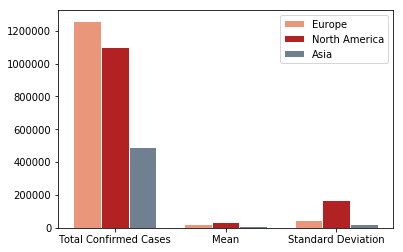

In [48]:
EU = [covid_continents.loc["Europe"].Total_confirmed_cases.max(), np.mean(europe.Total_confirmed_cases),
          np.std(europe.Total_confirmed_cases)]
NA = [covid_continents.loc["North America"].Total_confirmed_cases.max(), np.mean(north_america.Total_confirmed_cases), 
        np.std(north_america.Total_confirmed_cases)]
AS = [covid_continents.loc["Asia"].Total_confirmed_cases.max(), np.mean(asia.Total_confirmed_cases),
      np.std(asia.Total_confirmed_cases)]

barWidth = 0.25
r1 = np.arange(len(EU))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, EU, color='darksalmon', width=barWidth, edgecolor='white', label='Europe')
plt.bar(r2, NA, color='firebrick', width=barWidth, edgecolor='white', label='North America')
plt.bar(r3, AS, color='slategrey', width=barWidth, edgecolor='white', label='Asia')
 
plt.xticks([r + barWidth for r in range(len(EU))], ['Total Confirmed Cases', 'Mean', 'Standard Deviation'])
plt.legend()
plt.show()


## Extract indicators for countries with top 10 confirmed number of cases in each of 3 continents

### Read all indicators

In [49]:
demo_eco = pd.read_csv('demographics_economics_indicators.csv')
medical = pd.read_csv('health_system_indicators.csv',index_col=0)
total_per_million = pd.read_csv('total_per_million_0429.csv',index_col=0)

### Merge all indicators from all the countries

In [50]:
df=pd.merge(demo_eco,medical, how='outer', on=['Country Name']) #merge all the indicatorss into one dataframe
df.drop(df.columns[0],axis=1,inplace=True) #drop the unnamed column
df.head() 


,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,hospital_beds per_thousand_2014,Health_expenditure per_capita_2017,Health_expenditure out_of_pocket per_capita_2017,Physicians per_thousand_2016,handwashing facilities%_2016,Total_tests per_thousand
0,Afghanistan,5239401.0,9784129.0,7062361.0,10809505.0,841098.0,18.600000,11.118,1955.006208,0.5,67.122650,75.482577,0.2840,37.666535,NaN
1,Albania,171783.0,355206.0,475257.0,1554614.0,366492.0,38.000000,12.331,13364.155397,NaN,NaN,NaN,1.1998,NaN,NaN
2,Algeria,4663613.0,6760782.0,6614548.0,19492212.0,2340373.0,29.100000,11.704,15481.787620,NaN,258.494293,32.548839,1.8300,83.652782,NaN
3,Angola,5158374.0,7957871.0,5329040.0,8771497.0,642523.0,16.799999,6.886,6452.355165,NaN,114.459641,34.121013,NaN,26.521273,NaN
4,Argentina,3718139.0,7221374.0,6894781.0,20839515.0,4743956.0,31.900000,9.789,20610.568550,5.0,1324.603516,15.018527,NaN,NaN,1.24


### Merge all 30 countries (10 from each selected continent) with their indicators accordingly

In [51]:
countries_20 = asia_10.append(eu_10)
countries_30 = np.sort(na_10.append(countries_20))      # Sorted version of the 30 chosen countries
countries_30 = pd.DataFrame({'Country Name':countries_30})

countries_factors = pd.merge(df,countries_30, how='inner', on=['Country Name']) # Extract indicators of 30 countries
countries_factors.head()

,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,hospital_beds per_thousand_2014,Health_expenditure per_capita_2017,Health_expenditure out_of_pocket per_capita_2017,Physicians per_thousand_2016,handwashing facilities%_2016,Total_tests per_thousand
0,Belgium,644952.0,1274467.0,1325250.0,5995378.0,2047893.0,41.799999,5.589,51407.998337,6.2,4507.356445,17.638223,3.3234,NaN,26.344
1,Canada,1943660.0,3800358.0,4610394.0,19790246.0,5805051.0,41.400002,5.564,48130.255973,NaN,4754.947754,14.219750,2.5668,NaN,20.095
2,China,85884695.0,161188094.0,182107622.0,832669638.0,135178504.0,38.700001,4.320,18236.612982,NaN,440.825623,36.050412,NaN,NaN,NaN
3,Costa Rica,350326.0,722240.0,809903.0,2497433.0,427950.0,33.599998,11.854,17671.095353,1.1,869.077759,21.255390,NaN,NaN,1.811
4,Dominican Republic,1062224.0,2091961.0,1917906.0,4755883.0,700420.0,27.600000,5.845,17748.185319,1.6,433.208588,44.738197,NaN,55.042885,NaN


### Data scaling and reorganization

In [52]:
Total_population = countries_factors['Under-5s_2015']+countries_factors['5-14 years_2015']+countries_factors['15-24 years_2015']+countries_factors['25-64 years_2015']+countries_factors['65+ years_2015']
countries_factors['Under-5s_2015'] = countries_factors['Under-5s_2015']/Total_population
countries_factors['65+ years_2015'] = countries_factors['65+ years_2015']/Total_population
countries_factors['5-14 years_2015'] = countries_factors['5-14 years_2015']/Total_population
countries_factors['15-24 years_2015'] = countries_factors['15-24 years_2015']/Total_population
countries_factors['25-64 years_2015'] = countries_factors['25-64 years_2015']/Total_population

# Drop columns that have too many NaNs
countries_all_factors = countries_factors.drop(['hospital_beds per_thousand_2014','handwashing facilities%_2016'],axis=1)
# Replace the missing data with the mean of that column
countries_all_factors.fillna(countries_all_factors.mean(), inplace=True)

countries_all_factors.head()

,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,Health_expenditure per_capita_2017,Health_expenditure out_of_pocket per_capita_2017,Physicians per_thousand_2016,Total_tests per_thousand
0,Belgium,0.057136,0.112905,0.117404,0.531131,0.181423,41.799999,5.589,51407.998337,4507.356445,17.638223,3.323400,26.3440
1,Canada,0.054066,0.105713,0.128246,0.550498,0.161477,41.400002,5.564,48130.255973,4754.947754,14.219750,2.566800,20.0950
2,China,0.061477,0.115379,0.130354,0.596029,0.096761,38.700001,4.320,18236.612982,440.825623,36.050412,2.754165,15.9661
3,Costa Rica,0.072865,0.150221,0.168454,0.519449,0.089011,33.599998,11.854,17671.095353,869.077759,21.255390,2.754165,1.8110
4,Dominican Republic,0.100891,0.198697,0.182165,0.451720,0.066527,27.600000,5.845,17748.185319,433.208588,44.738197,2.754165,15.9661


### Find the relationship between confirmed cases and the different factors

In [53]:
countries_selected = countries_all_factors['Country Name']

# Select the 30 counties from the total_per_million dataframe
total_per_million_selected = pd.DataFrame()
for x in countries_selected:
     total_per_million_selected = total_per_million_selected.append(total_per_million[total_per_million['Country Name']== x])

# Merge all factors into one dataframe
countries_all_factors = pd.merge(countries_all_factors,total_per_million_selected, how='inner', on=['Country Name'])
countries_all_factors.head()

,Country Name,Under-5s_2015,5-14 years_2015,15-24 years_2015,25-64 years_2015,65+ years_2015,median age_2020,umemployment rate_2019,GDP_2018,Health_expenditure per_capita_2017,Health_expenditure out_of_pocket per_capita_2017,Physicians per_thousand_2016,Total_tests per_thousand,Total cases per million
0,Belgium,0.057136,0.112905,0.117404,0.531131,0.181423,41.799999,5.589,51407.998337,4507.356445,17.638223,3.323400,26.3440,4084.173
1,Canada,0.054066,0.105713,0.128246,0.550498,0.161477,41.400002,5.564,48130.255973,4754.947754,14.219750,2.566800,20.0950,1325.176
2,China,0.061477,0.115379,0.130354,0.596029,0.096761,38.700001,4.320,18236.612982,440.825623,36.050412,2.754165,15.9661,58.319
3,Costa Rica,0.072865,0.150221,0.168454,0.519449,0.089011,33.599998,11.854,17671.095353,869.077759,21.255390,2.754165,1.8110,138.395
4,Dominican Republic,0.100891,0.198697,0.182165,0.451720,0.066527,27.600000,5.845,17748.185319,433.208588,44.738197,2.754165,15.9661,591.451


Under-5s_2015 : slope = -29266.298 intercept =  3638.992


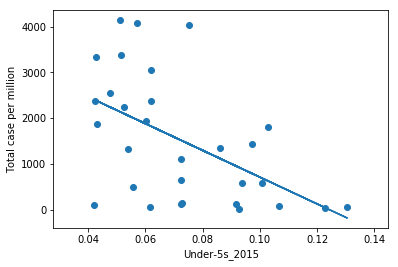

5-14 years_2015 : slope = -18382.845 intercept =  4136.949


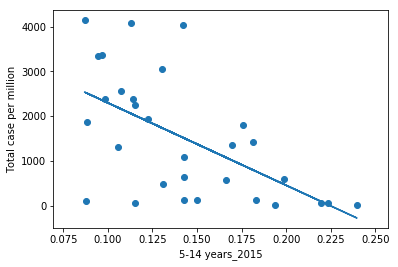

15-24 years_2015 : slope = -25375.172 intercept =  5188.712


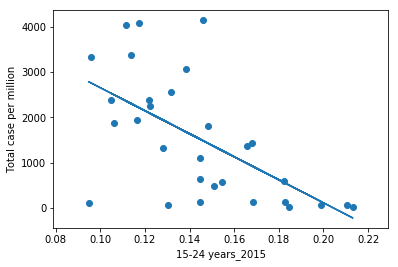

25-64 years_2015 : slope =  12489.506 intercept = -4938.455


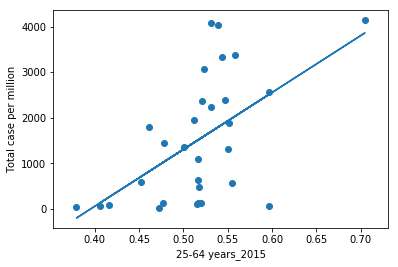

65+ years_2015 : slope =  7887.978 intercept =  542.851


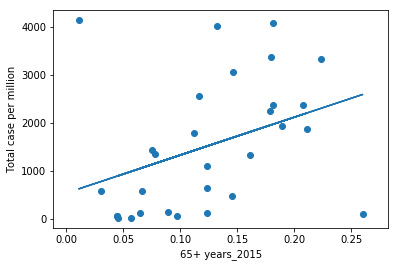

median age_2020 : slope =  93.182 intercept = -1877.369


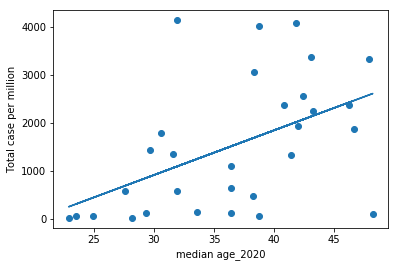

umemployment rate_2019 : slope = -60.018 intercept =  1835.997


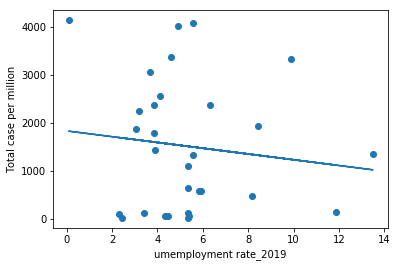

GDP_2018 : slope =  0.037 intercept = -75.010


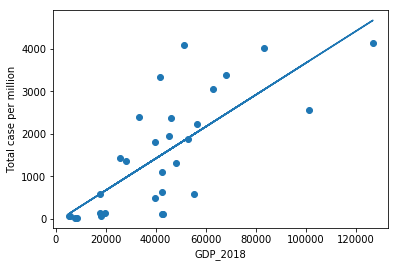

Health_expenditure per_capita_2017 : slope =  0.323 intercept =  612.869


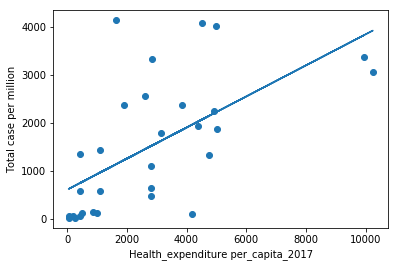

Health_expenditure out_of_pocket per_capita_2017 : slope = -46.637 intercept =  2737.239


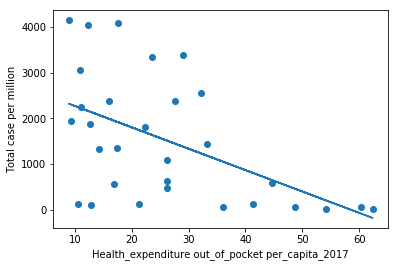

Physicians per_thousand_2016 : slope =  873.311 intercept = -889.421


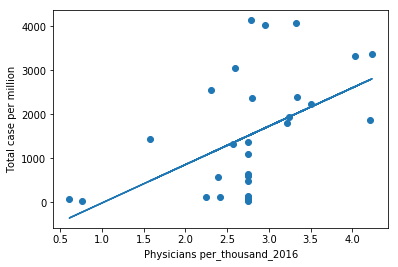

Total_tests per_thousand : slope =  73.112 intercept =  348.503


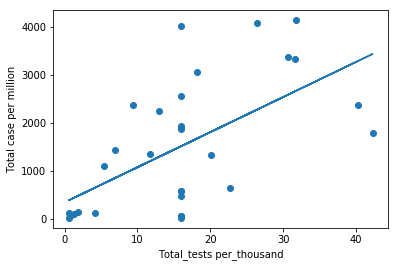

In [54]:
#draw scatter plot to show the relationship between total case per million and the different factors
for column in countries_all_factors.columns[1:13]:
    plt.scatter(countries_all_factors[column],countries_all_factors['Total cases per million'])
    #plot a linear regression line and find the slope for each graph
    model = LinearRegression().fit(countries_all_factors[[column]], countries_all_factors['Total cases per million'] )
    predictions = countries_all_factors[column] * model.coef_[0] + model.intercept_
    print(column,':','slope = % .3f' %model.coef_[0],'intercept = % .3f' %model.intercept_)
    
    plt.plot(countries_all_factors[column],predictions)
    plt.xlabel(column)
    plt.ylabel('Total case per million')
    plt.show()
    

In [55]:
for col in countries_all_factors.columns[1:13]:
    rank_correlation = np.corrcoef(countries_all_factors[col].rank() , countries_all_factors['Total cases per million'].rank())[0,1]
    print('rank correlation between', col, 'and total cases per million = % .3f' %rank_correlation)

rank correlation between Under-5s_2015 and total cases per million = -0.525
rank correlation between 5-14 years_2015 and total cases per million = -0.630
rank correlation between 15-24 years_2015 and total cases per million = -0.619
rank correlation between 25-64 years_2015 and total cases per million =  0.588
rank correlation between 65+ years_2015 and total cases per million =  0.471
rank correlation between median age_2020 and total cases per million =  0.550
rank correlation between umemployment rate_2019 and total cases per million = -0.028
rank correlation between GDP_2018 and total cases per million =  0.762
rank correlation between Health_expenditure per_capita_2017 and total cases per million =  0.712
rank correlation between Health_expenditure out_of_pocket per_capita_2017 and total cases per million = -0.522
rank correlation between Physicians per_thousand_2016 and total cases per million =  0.595
rank correlation between Total_tests per_thousand and total cases per million 

## Government response and policy stringency 

In [56]:
csi=pd.read_csv('Government_Response_Stringency_Index.csv',index_col=0)
csi.head()

,Country Name,Date,"Government Response Stringency Index ((0 to 100, 100 = strictest))"
0,Afghanistan,"Jan 1, 2020",0.0
1,Afghanistan,"Jan 2, 2020",0.0
2,Afghanistan,"Jan 3, 2020",0.0
3,Afghanistan,"Jan 4, 2020",0.0
4,Afghanistan,"Jan 5, 2020",0.0


In [57]:
# Extract data for the 30 countries
csi=pd.merge(csi,countries_30, how='inner', on=['Country Name']) 

# Set "Country Name" to index 
csi.set_index('Country Name', inplace=True, drop=True)
csi.head()

# Convert date to number of days after 01/01/20 and add that column to df
# Acknowledge Prof.Mimno's code
csi["Date"] = pd.to_datetime(csi["Date"])
start_date = pd.Timestamp("2020-01-01")
csi["Daysafter"] = (csi["Date"] - start_date).dt.days

csi.head()

,Date,"Government Response Stringency Index ((0 to 100, 100 = strictest))",Daysafter
Country Name,,,
Belgium,2020-01-01,0.0,0
Belgium,2020-01-02,0.0,1
Belgium,2020-01-03,0.0,2
Belgium,2020-01-04,0.0,3
Belgium,2020-01-05,0.0,4


In [58]:
# Find the number of days each country to reach the maximum Government Response Stringency Index before April 29th.
for i in range(len(countries_30)):
    country = countries_30.iloc[i]['Country Name']
    csi_max = csi.loc[country]['Government Response Stringency Index ((0 to 100, 100 = strictest))'].max()
    days = []
    for x in range(len(csi)):
        if csi.iloc[x]['Government Response Stringency Index ((0 to 100, 100 = strictest))'] == csi_max:
            days.append(csi.iloc[x]['Daysafter'])
    print("\nCountry:", country) 
    print("Maximum Stringency Index:", csi_max)
    print("Number of days to reach max stringency index:", days[0])
    


Country: Belgium
Maximum Stringency Index: 83.6
Number of days to reach max stringency index: 79

Country: Canada
Maximum Stringency Index: 76.73
Number of days to reach max stringency index: 91

Country: China
Maximum Stringency Index: 71.45
Number of days to reach max stringency index: 55

Country: Costa Rica
Maximum Stringency Index: 81.61
Number of days to reach max stringency index: 117

Country: Cuba
Maximum Stringency Index: 83.07
Number of days to reach max stringency index: 107

Country: Dominican Republic
Maximum Stringency Index: 98.02
Number of days to reach max stringency index: 118

Country: France
Maximum Stringency Index: 93.38
Number of days to reach max stringency index: 116

Country: Germany
Maximum Stringency Index: 81.75
Number of days to reach max stringency index: 96

Country: Guatemala
Maximum Stringency Index: 97.35
Number of days to reach max stringency index: 108

Country: Honduras
Maximum Stringency Index: 100.0
Number of days to reach max stringency index:

In [ ]:
# Calculate the area under the curve from first day to peak 



## Calculate rank correlation for each indicator